In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.gaussian_process as sk
from scipy.integrate import solve_ivp as solve_ivp
from sklearn.gaussian_process.kernels import Matern, RBF,  ConstantKernel
from scipy.interpolate import interp1d as interp1d
import imageio
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib

plt.rcParams["font.family"] = "Arial"

In [2]:
b_0 = np.loadtxt('Data/b.txt')[1:,1:]
bt_0 = np.loadtxt('Data/bt.txt')[1:,1:]
bx_0 = np.loadtxt('Data/bx.txt')[1:,1:]
bxx_0 = np.loadtxt('Data/bxx.txt')[1:,1:]
c_0 = np.loadtxt('Data/c.txt')[1:,1:]
ct_0 = np.loadtxt('Data/ct.txt')[1:,1:]
cx_0 = np.loadtxt('Data/cx.txt')[1:,1:]
cxx_0 = np.loadtxt('Data/cxx.txt')[1:,1:]
r_ar_0 = np.loadtxt('Data/x.txt')[1:,0]
t_ar_0 = np.loadtxt('Data/t.txt')[0,1:]


NR0 = r_ar_0.shape[0]
NT0 = t_ar_0.shape[0]



In [3]:
rmin, rmax = 1+1, 500+1
tmin, tmax = 0, -100
Nr=1
Nt=10

r_ar_1=r_ar_0[rmin:rmax:Nr]
t_ar_1=t_ar_0[tmin:tmax:Nt]

NR1, NT1=r_ar_1.shape[0], t_ar_1.shape[0]

b1 = b_0[rmin:rmax:Nr, tmin:tmax:Nt]


In [4]:
Res = pd.read_excel('NNPDEdata.xlsx', index_col=0).values

In [5]:
Rel_er = np.abs(b1.T-Res[:,:int(998/2)])/np.max(b1)*100

In [6]:
r1, t1 = np.meshgrid(r_ar_1,  np.arange(200, 291,1 ))

r1.shape, t1.shape, Res.shape

((91, 499), (91, 499), (91, 998))

<IPython.core.display.Javascript object>


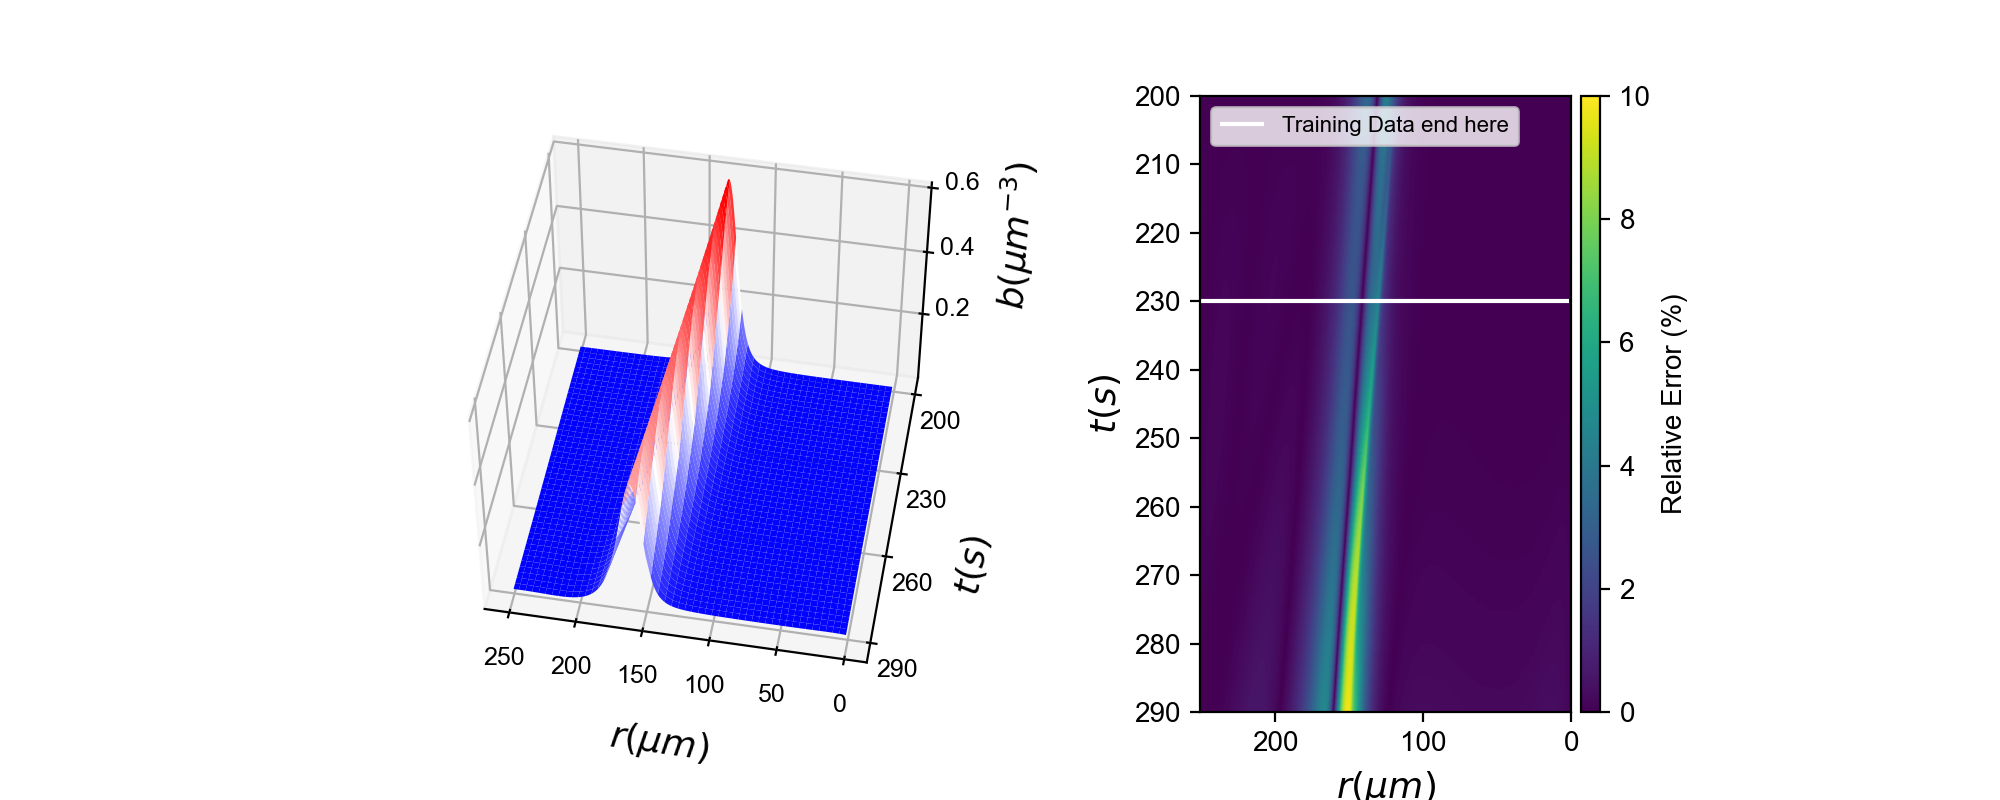

/var/folders/3m/3p64m5xj2c95fr3bxs4pbr9h0000gn/T/ipykernel_12605/2190677470.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 =plt.subplot(121,  projection='3d')


In [7]:
fig, ax = plt.subplots(figsize=[10,4], tight_layout=False)# dpi=400)
ax1 =plt.subplot(121,  projection='3d')

fig.subplots_adjust(wspace=0.0, hspace=0.2, right=0.8, left=0.2)


ax1.plot_surface(r1, t1, Res[:,:499]  , cmap=cm.bwr)

ax1.set_zlabel('$b (\mu m^{-3})$', fontsize=13)
ax1.set_xlabel('$r (\mu m)$', fontsize=13)
ax1.set_ylabel('$t (s)$', fontsize=13)
ax1.set_yticks([200, 230, 260, 290])
ax1.set_zticks([0.2, 0.4, 0.6])
ax1.tick_params(axis='x', labelsize= 9)
ax1.tick_params(axis='y', labelsize= 9)
ax1.tick_params(axis='z', labelsize= 9)
ax1.tick_params(axis='z', which='major', pad=0)
ax1.tick_params(axis='y', which='major', pad=0)
ax1.tick_params(axis='x', which='major', pad=0)
ax1.view_init(elev=48., azim=100)




ax2 =plt.subplot(133)

im1=ax2.imshow(Rel_er[:, ::-1], aspect ='auto', origin='upper', vmin=0, vmax=10, extent=[r_ar_1[-1], 0, 
                                                                          t_ar_1[-1], t_ar_1[0]])

ax2.set_xlabel('$r (\mu m)$', fontsize=13)
ax2.set_ylabel('$t (s)$', fontsize=13)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax2.hlines(230, r_ar_1[0], r_ar_1[-1], color='white', label='Training Data end here')
ax2.legend(fontsize=8, loc='upper left')
clb1 = fig.colorbar(im1, cax=cax, orientation='vertical', label='Relative Error (%)')